# Saliency Maps
***


*   Ejemplo obtenido de la documentación de [tf-keras-vis](https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html#Vanilla-Saliency)
* Uso del método saliency maps (o vanilla backpropagation) propuesto en [Simonyan et al., 2013].


[Simonyan et al., 2013] Simonyan, K., Vedaldi, A., and Zisserman, A. (2013). Deep inside convolutional networks: Visualising image classification models and saliency maps. *arXiv preprint arXiv:1312.6034*





# Bibliotecas necesarias

In [11]:
#! pip install tf-keras-vis tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Tensorflow recognized 1 GPUs


# Cargando modelo VGG16
***

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

# Imágenes de prueba

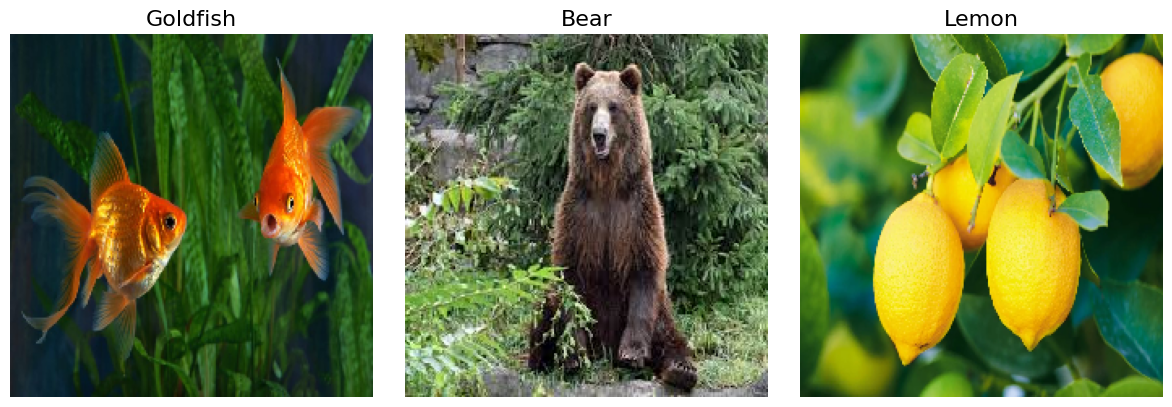

In [13]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Título de las imágenes
image_titles = ['Goldfish', 'Bear', 'Lemon']

# Cargar las imágenesá y transformarlas a arreglos de numpy
img1 = load_img('/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/images/Goldfish.jpeg', target_size=(224, 224))
img2 = load_img('/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/images/bear.JPEG', target_size=(224, 224))
img3 = load_img('/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/images/lemons-tree.jpg', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preprocesamiento de los datos para entrar a VGG16
X = preprocess_input(images)

# Mostrando imágenes
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()


# Usando módulo *tf_keras_vis*
## Saliency Maps

Cuando la última capa de la red tiene la función de activación softmax, se reemplaza por una función de activación lineal.
Se puede usar ReplaceToLinear o una función propia.

In [14]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

# Instead of using the ReplaceToLinear instance above,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

In [17]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 es la etiqueta de la clase Goldfish, 294 para Bear y 951 para lemon
score = CategoricalScore([1, 294, 951])

# También se puede usar una función propia para generar etiquetas categóricas

def score_function(output):
    # `output`: salida del modelo
    # en este caso, `output` shape es `(3, 1000)` i.e., (samples, classes).
    return (output[0][1], output[1][294], output[2][951])

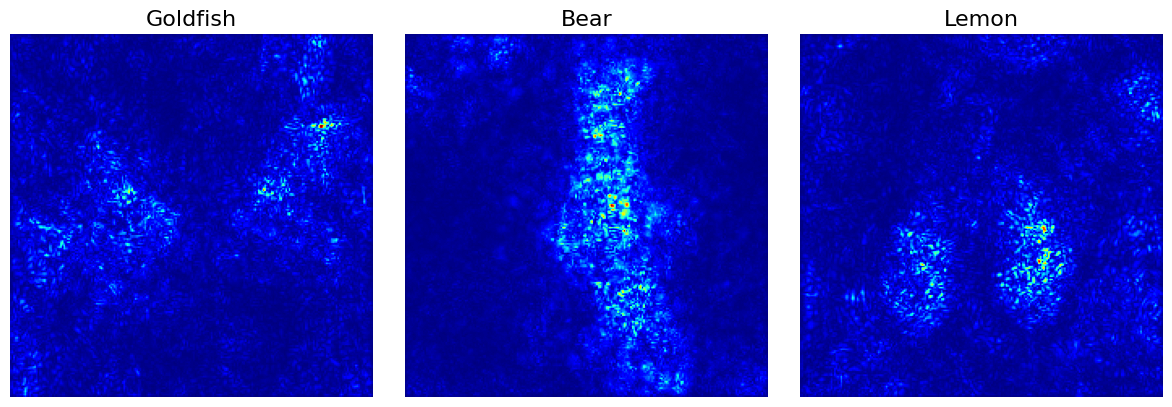

CPU times: user 1.48 s, sys: 796 ms, total: 2.28 s
Wall time: 2.31 s


In [18]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency


# Creación del objeto  Saliency
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

# Generación del 'mapa de prominencias'
saliency_map = saliency(score, X)


# Mostrando mapas
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()